# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

<p class="reading-options">
  <a class="btn" href="/text-analysis/topic-models-with-gensim">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Topic models with Gensim.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Topic models with Gensim.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

--2023-03-01 19:16:57--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483086 (6.2M) [text/csv]
Saving to: ‘data/recipes.csv’

recipes.csv         100%[===================>]   6.18M  13.1MB/s    in 0.5s    

2023-03-01 19:16:58 (13.1 MB/s) - ‘data/recipes.csv’ saved [6483086/6483086]

--2023-03-01 19:16:58--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10501219 (10M) [text/csv]
Saving to: ‘data/state-of-the-union

## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Our data

We'll be using the same dataset as we did [with scikit-learn](/text-analysis/introduction-to-topic-modeling/#Attempt-two:-State-of-the-Union-addresses): State of the Union addresses from 1790 to 2012, where America's president addresses the Congress about the coming year.

In [ ]:
import pandas as pd

df = pd.read_csv("data/state-of-the-union.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

<ipython-input-2-4699dee7d493>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


In [ ]:
print(df)

     year                                            content
0    1790  George Washington January          Fellow Citi...
1    1790   State of the Union Address George Washington ...
2    1791   State of the Union Address George Washington ...
3    1792   State of the Union Address George Washington ...
4    1793   State of the Union Address George Washington ...
..    ...                                                ...
221  2008   State of the Union Address George W  Bush Jan...
222  2009   Address to Joint Session of Congress  Barack ...
223  2010   State of the Union Address Barack Obama  Janu...
224  2011   State of the Union Address Barack Obama  Janu...
225  2012   State of the Union Address Barack Obama  Janu...

[226 rows x 2 columns]


In [ ]:
df.to_csv(r'file\File Name.csv', index=False)

## Using Gensim

In [ ]:
#!pip install --upgrade gensim

In [ ]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()

[(0,
  '0.084*"tonight" + 0.073*"program" + 0.066*"ve" + 0.065*"help" + 0.065*"budget" + 0.065*"mexico" + 0.065*"americans" + 0.061*"programs" + 0.059*"jobs" + 0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.123*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '-0.199*"tonight" + -0.177*"ve" + -0.163*"re" + 0.137*"program" + -0.094*"jobs" + -0.092*"ll" + 0.092*"farm" + -0.091*"iraq" + 0.087*"veterans" + 0.081*"interstate"'),
 (3,
  '0.142*"program" + -0.120*"silver" + -0.114*"re" + -0.110*"cent" + 0.106*"communist" + -0.105*"ve" + -0.098*"tonight" + 0.098*"soviet" + 0.095*"programs" + -0.090*"gold"'),
 (4,
  '0.198*"iraq" + 0.171*"terrorists" + -0.142*"silver" + -0.133*"gold" + 0.124*"interstate" + 0.118*"iraqi" + -0.112*"programs" + 0.110*"al" + -0.101*"notes" + -0.099*"mexico"'),
 (5,
  '-0.272*"iraq" + -0.237*"terrorists" + 0.185*"ve" + 0.185*"re" + -0.167*"iraqi" + -0.152*"al" +

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head(20)

,value,word,topic
0,0.083991,tonight,0
1,0.073468,program,0
2,0.065712,ve,0
3,0.065217,help,0
4,0.065030,budget,0
5,0.064892,mexico,0
6,0.064669,americans,0
7,0.060834,programs,0
8,0.058586,jobs,0
9,0.057700,re,0


Then we'll use seaborn to visualize it.

In [ ]:
import matplotlib.pyplot as plt


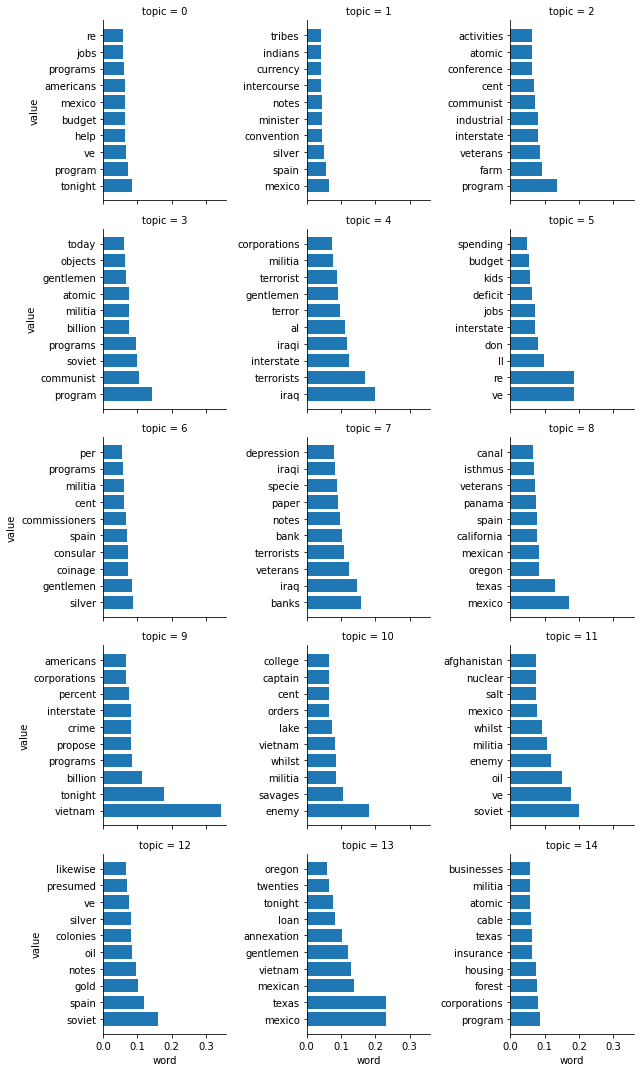

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## Using LDA with Gensim

Now we'll use LDA.

In [ ]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [ ]:
lda_model.print_topics()

[(0,
  '0.005*"1986" + 0.004*"1930" + 0.004*"1989" + 0.004*"1242" + 0.003*"1964" + 0.003*"1971" + 0.003*"1260" + 0.003*"1999" + 0.003*"1974" + 0.002*"1545"'),
 (1,
  '0.004*"1930" + 0.003*"1260" + 0.003*"1626" + 0.003*"1974" + 0.002*"1986" + 0.002*"1784" + 0.002*"1242" + 0.002*"973" + 0.002*"440" + 0.002*"1446"'),
 (2,
  '0.004*"1559" + 0.003*"1260" + 0.003*"951" + 0.002*"151" + 0.002*"1930" + 0.002*"440" + 0.002*"57" + 0.002*"1986" + 0.002*"468" + 0.002*"1090"'),
 (3,
  '0.005*"1260" + 0.003*"1986" + 0.003*"1930" + 0.003*"1559" + 0.002*"1964" + 0.002*"1995" + 0.002*"1971" + 0.002*"1242" + 0.002*"1896" + 0.002*"1626"'),
 (4,
  '0.005*"1559" + 0.003*"976" + 0.003*"951" + 0.002*"440" + 0.002*"57" + 0.002*"151" + 0.002*"1446" + 0.002*"1626" + 0.002*"1060" + 0.002*"1017"'),
 (5,
  '0.004*"1930" + 0.003*"1986" + 0.003*"1242" + 0.003*"1626" + 0.003*"1260" + 0.003*"1989" + 0.002*"1971" + 0.002*"973" + 0.002*"1559" + 0.002*"1896"'),
 (6,
  '0.003*"1930" + 0.002*"1260" + 0.002*"1626" + 0.002*"1

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.012443  0.000721       1        1  23.430749
12    -0.012080 -0.001287       2        1  19.614046
2      0.007471 -0.002442       3        1  15.940421
9      0.004456  0.004285       4        1   8.642900
0     -0.009408 -0.000673       5        1   5.989950
5     -0.002690  0.003548       6        1   5.583532
13     0.005097 -0.000597       7        1   4.431964
1     -0.001592  0.003851       8        1   4.393503
7      0.001332 -0.005696       9        1   3.603793
6      0.002483  0.000903      10        1   2.104736
8     -0.001021 -0.000564      11        1   2.014246
10     0.000765 -0.001725      12        1   1.828280
11    -0.000714 -0.002944      13        1   1.061090
14    -0.002248  0.001101      14        1   0.731148
3     -0.004295  0.001519      15        1   0.629643, topic_info=            Term        Freq       Total Category  logprob  loglift
1260   americans  751.000000  751.000000  Default  30.0000  30.0000
1930        help  730.000000  730.000000  Default  29.0000  29.0000
1559      mexico  889.000000  889.000000  Default  28.0000  28.0000
1986     program  674.000000  674.000000  Default  27.0000  27.0000
1242     million  549.000000  549.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1999     tonight    2.589457  463.437743  Topic15  -6.4538  -0.1195
1784        gold    2.485223  402.506463  Topic15  -6.4948  -0.0196
151   convention    2.609538  517.045810  Topic15  -6.4460  -0.2212
976        spain    2.557412  491.006071  Topic15  -6.4662  -0.1897
951     minister    2.539834  512.596356  Topic15  -6.4731  -0.2396

[1019 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
658       1  0.268175  absolute
658       2  0.151577  absolute
658       3  0.174897  absolute
658       4  0.093278  absolute
658       5  0.058299  absolute
...     ...       ...       ...
991      10  0.017091     youth
991      11  0.034181     youth
991      12  0.017091     youth
991      13  0.017091     youth
991      15  0.017091     youth

[7657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 13, 3, 10, 1, 6, 14, 2, 8, 7, 9, 11, 12, 15, 4])